In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
INPUT_FILE_HTTP3 = 'curl_http3_results.csv'
INPUT_FILE_HTTP2 = 'curl_http2_results.csv'
OUTPUT_FILE = 'timing_deltas_percentiles.csv'

In [25]:
df_http3 = pd.read_csv(INPUT_FILE_HTTP3).head(1000)
df_http3

,url,time_appconnect,time_connect,time_namelookup,time_pretransfer,time_redirect,time_starttransfer,time_total,remote_ip,remote_port
0,https://www.google.com,0.025157,0.0,0.001089,0.029132,0.0,0.174951,0.178593,172.217.16.196,443
1,https://www.facebook.com,0.013462,0.0,0.000959,0.014599,0.0,0.144340,0.144399,157.240.251.35,443
2,https://www.youtube.com,0.042819,0.0,0.010791,0.045107,0.0,0.113004,0.211162,142.250.185.78,443
3,https://www.googleapis.com,0.020777,0.0,0.001414,0.022276,0.0,0.126458,0.126549,142.250.185.106,443
4,https://www.instagram.com,0.017906,0.0,0.001750,0.019409,0.0,0.170712,0.363936,157.240.253.174,443
...,...,...,...,...,...,...,...,...,...,...
995,https://www.collider.com,0.109767,0.0,0.001112,0.111912,0.0,0.210754,0.210852,3.223.39.19,443
996,https://www.google.kg,0.018971,0.0,0.001145,0.020448,0.0,0.161555,0.163199,142.250.186.35,443
997,https://www.google.com.jm,0.018988,0.0,0.000917,0.020419,0.0,0.159363,0.163518,142.250.185.163,443
998,https://www.repocket.com,0.028569,0.0,0.016522,0.030403,0.0,0.039178,0.039262,172.67.139.50,443


In [26]:
df_http2 = pd.read_csv(INPUT_FILE_HTTP2)
df_http2

,url,time_appconnect,time_connect,time_namelookup,time_pretransfer,time_redirect,time_starttransfer,time_total,remote_ip,remote_port
0,https://www.google.com,0.019560,0.005905,0.002110,0.019765,0.0,0.081241,0.082464,172.217.16.196,443
1,https://www.facebook.com,0.022552,0.007826,0.003246,0.023009,0.0,0.136764,0.136822,157.240.253.35,443
2,https://www.youtube.com,0.031584,0.008676,0.004785,0.031730,0.0,0.096695,0.197361,216.58.206.78,443
3,https://www.googleapis.com,0.018611,0.006029,0.001794,0.018772,0.0,0.122874,0.122950,142.250.74.202,443
4,https://www.instagram.com,0.013110,0.005455,0.001294,0.013254,0.0,0.169643,0.371481,157.240.253.174,443
...,...,...,...,...,...,...,...,...,...,...
995,https://www.collider.com,0.208717,0.104169,0.001454,0.208897,0.0,0.318439,0.318553,3.223.39.19,443
996,https://www.google.kg,0.021820,0.005513,0.001731,0.022281,0.0,0.219518,0.224054,142.250.186.35,443
997,https://www.google.com.jm,0.019007,0.007023,0.002980,0.019261,0.0,0.226611,0.233285,216.58.206.35,443
998,https://www.repocket.com,0.020195,0.011979,0.007426,0.020352,0.0,0.031581,0.031749,104.21.87.17,443


In [27]:
df_merged = pd.merge(df_http2, df_http3, on='url', suffixes=('_http2', '_http3'))
df_merged

,url,time_appconnect_http2,time_connect_http2,time_namelookup_http2,time_pretransfer_http2,time_redirect_http2,time_starttransfer_http2,time_total_http2,remote_ip_http2,remote_port_http2,time_appconnect_http3,time_connect_http3,time_namelookup_http3,time_pretransfer_http3,time_redirect_http3,time_starttransfer_http3,time_total_http3,remote_ip_http3,remote_port_http3
0,https://www.google.com,0.019560,0.005905,0.002110,0.019765,0.0,0.081241,0.082464,172.217.16.196,443,0.025157,0.0,0.001089,0.029132,0.0,0.174951,0.178593,172.217.16.196,443
1,https://www.facebook.com,0.022552,0.007826,0.003246,0.023009,0.0,0.136764,0.136822,157.240.253.35,443,0.013462,0.0,0.000959,0.014599,0.0,0.144340,0.144399,157.240.251.35,443
2,https://www.youtube.com,0.031584,0.008676,0.004785,0.031730,0.0,0.096695,0.197361,216.58.206.78,443,0.042819,0.0,0.010791,0.045107,0.0,0.113004,0.211162,142.250.185.78,443
3,https://www.googleapis.com,0.018611,0.006029,0.001794,0.018772,0.0,0.122874,0.122950,142.250.74.202,443,0.020777,0.0,0.001414,0.022276,0.0,0.126458,0.126549,142.250.185.106,443
4,https://www.instagram.com,0.013110,0.005455,0.001294,0.013254,0.0,0.169643,0.371481,157.240.253.174,443,0.017906,0.0,0.001750,0.019409,0.0,0.170712,0.363936,157.240.253.174,443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://www.collider.com,0.208717,0.104169,0.001454,0.208897,0.0,0.318439,0.318553,3.223.39.19,443,0.109767,0.0,0.001112,0.111912,0.0,0.210754,0.210852,3.223.39.19,443
996,https://www.google.kg,0.021820,0.005513,0.001731,0.022281,0.0,0.219518,0.224054,142.250.186.35,443,0.018971,0.0,0.001145,0.020448,0.0,0.161555,0.163199,142.250.186.35,443
997,https://www.google.com.jm,0.019007,0.007023,0.002980,0.019261,0.0,0.226611,0.233285,216.58.206.35,443,0.018988,0.0,0.000917,0.020419,0.0,0.159363,0.163518,142.250.185.163,443
998,https://www.repocket.com,0.020195,0.011979,0.007426,0.020352,0.0,0.031581,0.031749,104.21.87.17,443,0.028569,0.0,0.016522,0.030403,0.0,0.039178,0.039262,172.67.139.50,443


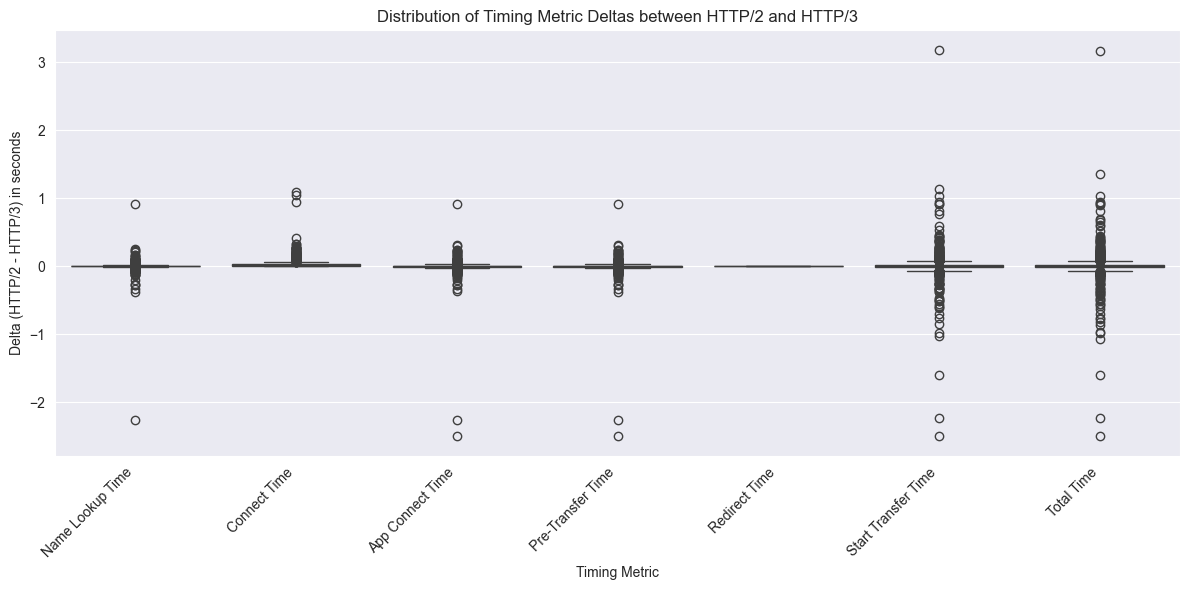

In [29]:
timing_metrics = [
    'time_namelookup',
    'time_connect',
    'time_appconnect',
    'time_pretransfer',
    'time_redirect',
    'time_starttransfer',
    'time_total'
]

delta_columns = []
for metric in timing_metrics:
    delta_col = f'delta_{metric}'
    delta_columns.append(delta_col)
    df_merged[delta_col] = df_merged[f'{metric}_http2'] - df_merged[f'{metric}_http3']

delta_data = df_merged[delta_columns]
delta_melted = delta_data.melt(var_name='Metric', value_name='Delta')

metric_labels = {
    'delta_time_namelookup': 'Name Lookup Time',
    'delta_time_connect': 'Connect Time',
    'delta_time_appconnect': 'App Connect Time',
    'delta_time_pretransfer': 'Pre-Transfer Time',
    'delta_time_redirect': 'Redirect Time',
    'delta_time_starttransfer': 'Start Transfer Time',
    'delta_time_total': 'Total Time'
}
delta_melted['Metric'] = delta_melted['Metric'].map(metric_labels)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Metric', y='Delta', data=delta_melted)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Timing Metric')
plt.ylabel('Delta (HTTP/2 - HTTP/3) in seconds')
plt.title('Distribution of Timing Metric Deltas between HTTP/2 and HTTP/3')
plt.tight_layout()
plt.show()

In [32]:
percentiles = {}
for metric in delta_columns:
    q25 = df_merged[metric].quantile(0.25)
    q50 = df_merged[metric].quantile(0.50)
    q75 = df_merged[metric].quantile(0.75)
    percentiles[metric] = {'25th Percentile': q25, '50th Percentile': q50, '75th Percentile': q75}

percentiles_df = pd.DataFrame(percentiles).transpose()
percentiles_df.index = percentiles_df.index.map(metric_labels)
percentiles_df.to_csv(OUTPUT_FILE, index_label='Metric')

In [31]:
percentiles_df['IQR'] = percentiles_df['75th Percentile'] - percentiles_df['25th Percentile']
percentiles_df

,25th Percentile,50th Percentile,75th Percentile,IQR
Name Lookup Time,-0.002684,0.000231,0.005764,0.008448
Connect Time,0.007898,0.017049,0.028680,0.020782
App Connect Time,-0.005727,0.000100,0.008225,0.013953
Pre-Transfer Time,-0.007306,-0.001323,0.006483,0.013789
Redirect Time,0.000000,0.000000,0.000000,0.000000
Start Transfer Time,-0.012943,0.001044,0.021439,0.034382
Total Time,-0.018119,-0.000879,0.020109,0.038228
